# Polarized Spectra Calculation using Hazel2


### In this exercise we will make sure our Hazel2 is working properly and we will use it to calculate some example spectra and illustrate some properties of the Hanle effect and He 10830 polarization.

In [1]:
# We will start by importing our necessary pacakges:
import hazel
import numpy as np 
import matplotlib.pyplot as plt 

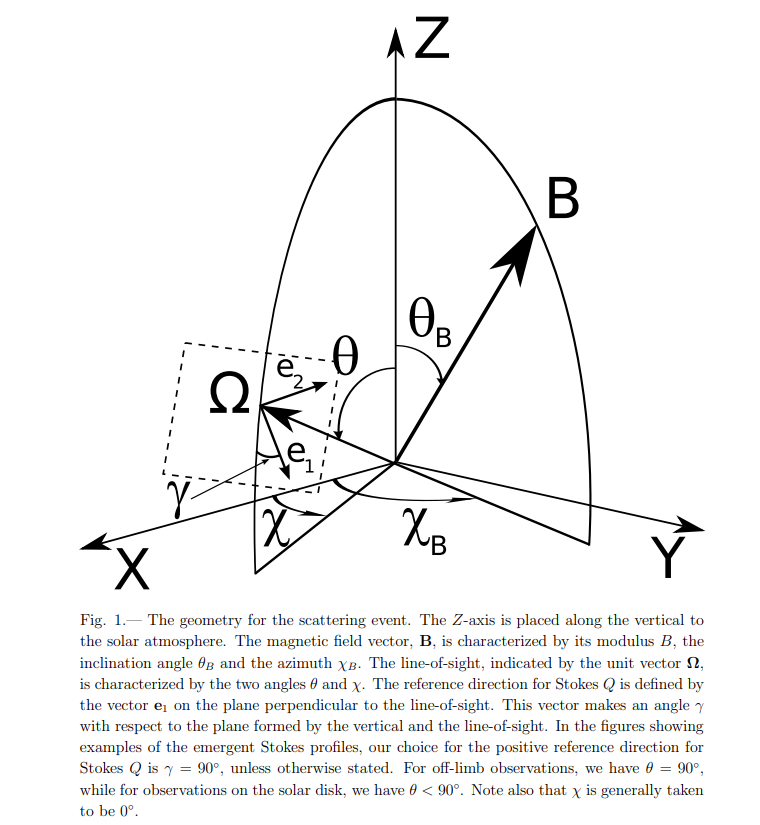

In [2]:
# We will first create a model:
mod = hazel.Model(working_mode='synthesis')

# The model contains the information about the desired wavelength grid, the so called 'topology', line of sight, and the boundary condition:
mod.add_spectral({'Name': 'spec1', 'Wavelength': [10828, 10831, 301], 'topology': 'ch1',
    'LOS': [0.0,0.0,0.0], 'Boundary condition': [1.0,0.0,0.0,0.0]})

# It also contains the general information about our "chromosphere"

mod.add_chromosphere({'Name': 'ch1', 'Spectral region': 'spec1', 'Height': 3.0, 'Line': '10830', 'Wavelength': [10826, 10833]})
mod.setup()
# note that the height of the slab above the solar surface is given here,in arcseconds.

# Then finally we can set up the parameters of the model. In order of appearence, these are:
# Bx, By, Bz, magnetic field in the cartesian (heliocentric) coordinates 
# Optical depth of the red component (tau)
# LOS velocity
# Thermal velocity
# Beta, which is an ad-hoc parameter used to explain 'unusual' profiles (e.g. in flares) 
# Damping
# Filling factor (provided separately) - only used in the case when we have multiple slabs, lying horizontally 
# next to eeach other, and occupying the same pixel

Bx = 0.0
By = 0.0
Bz = 0.0
tau = 1.0
vlos =0.0
vth = 8.0
a = 0.1


mod.atmospheres['ch1'].set_parameters([Bx,By,Bz,tau,vlos,vth,1.0,a],1.0)
mod.synthesize()

stokes = np.copy(mod.spectrum['spec1'].stokes)
stokes.shape






(4, 301)

(-0.05, 0.05)

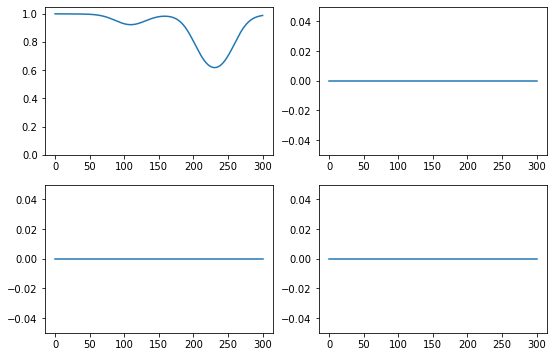

In [3]:
plt.figure(figsize=[9,6])
plt.subplot(221)
plt.plot(stokes[0,:])
plt.ylim([0,1.05])
plt.subplot(222)
plt.plot(stokes[1,:])
plt.ylim([-0.05,0.05])
plt.subplot(223)
plt.plot(stokes[2,:])
plt.ylim([-0.05,0.05])
plt.subplot(224)
plt.plot(stokes[3,:])
plt.ylim([-0.05,0.05])

## Wow, there is no polarization? Why is it so? 

.
.
.
.
.
.
.
.
.
.

## That's right, it is because we are at *disk center*. At disk center, in the absence of the magnetic fields. To change that, we need to change the viewing angle, i.e. our 'line-of-sight'

(-0.01, 0.01)

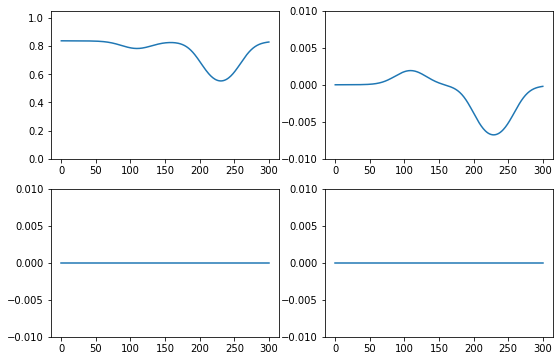

In [9]:
# To change your viewing angle, change the LOS section of the add_spectral (recall the coordinate system!)

del(mod)
mod = hazel.Model(working_mode='synthesis')
mod.add_spectral({'Name': 'spec1', 'Wavelength': [10828, 10831, 301], 'topology': 'ch1',
    'LOS': [60.0,0.0,0.0], 'Boundary condition': [1.0,0.0,0.0,0.0]})
mod.add_chromosphere({'Name': 'ch1', 'Spectral region': 'spec1', 'Height': 3.0, 'Line': '10830', 'Wavelength': [10826, 10833]})
mod.setup()


mod.atmospheres['ch1'].set_parameters([Bx,By,Bz,tau,vlos,vth,1.0,a],1.0)
mod.synthesize()
plt.figure(figsize=[9,6])
plt.subplot(221)
plt.plot(mod.spectrum['spec1'].stokes[0,:])
plt.ylim([0,1.05])
plt.subplot(222)
plt.plot(mod.spectrum['spec1'].stokes[1,:])
plt.ylim([-0.01,0.01])
plt.subplot(223)
plt.plot(mod.spectrum['spec1'].stokes[2,:])
plt.ylim([-0.01,0.01])
plt.subplot(224)
plt.plot(mod.spectrum['spec1'].stokes[3,:])
plt.ylim([-0.01,0.01])

### Experiment a bit with changing the inclination angle. What about changing the angle for reference direction of Stokes $Q$?

### We mentioned multiple times that the height of the slab above the solar surface determines how much polarization there will be (can anyone recall the reasoning? 2-3 mins).

### Let's test that. 

(-0.02, 0.02)

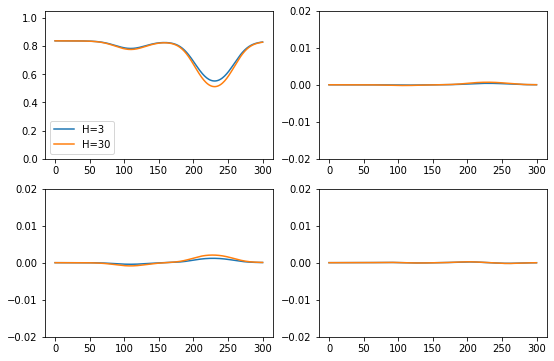

In [36]:
del(mod)
tau = 1.0
mod = hazel.Model(working_mode='synthesis')
mod.add_spectral({'Name': 'spec1', 'Wavelength': [10828, 10831, 301], 'topology': 'ch1',
    'LOS': [60.0,0.0,0.0], 'Boundary condition': [1.0,0.0,0.0,0.0]})
mod.add_chromosphere({'Name': 'ch1', 'Spectral region': 'spec1', 'Height': 3.0, 'Line': '10830', 'Wavelength': [10826, 10833]})
mod.setup()
mod.atmospheres['ch1'].set_parameters([Bx,By,Bz,tau,vlos,vth,1.0,a],1.0)
mod.synthesize()
spec1 = np.copy(mod.spectrum['spec1'].stokes)
del(mod)

mod = hazel.Model(working_mode='synthesis')
mod.add_spectral({'Name': 'spec1', 'Wavelength': [10828, 10831, 301], 'topology': 'ch1',
    'LOS': [60.0,0.0,0.0], 'Boundary condition': [1.0,0.0,0.0,0.0]})
mod.add_chromosphere({'Name': 'ch1', 'Spectral region': 'spec1', 'Height': 30.0, 'Line': '10830', 'Wavelength': [10826, 10833]})
mod.setup()
mod.atmospheres['ch1'].set_parameters([Bx,By,Bz,tau,vlos,vth,1.0,a],1.0)
mod.synthesize()
spec2 = np.copy(mod.spectrum['spec1'].stokes)

plt.figure(figsize=[9,6])
plt.subplot(221)
plt.plot(spec1[0],label='H=3')
plt.plot(spec2[0],label='H=30')
plt.legend()
plt.ylim([0,1.05])
plt.subplot(222)
plt.plot(spec1[1])
plt.plot(spec2[1])
plt.ylim([-0.02,0.02])
plt.subplot(223)
plt.plot(spec1[2])
plt.plot(spec2[2])
plt.ylim([-0.02,0.02])
plt.subplot(224)
plt.plot(spec1[3])
plt.plot(spec2[3])
plt.ylim([-0.02,0.02])



## There are two major differences between the two slabs. Try to explain why it is so. 

### 1) Line is a little bit deeper.

### 2) Polarization is stronger. 

### So, even without the magnetic field, the polarization exists. What does the magnetic field do then? 

### It *rotates* and *changes* the amount of polarization (people typically say it diminishes the polarization, but there are viewing geometries in which the magnetic field actually *creates* the polarization (we will see that real soon).

### Let's introduce magnetic field in our model.

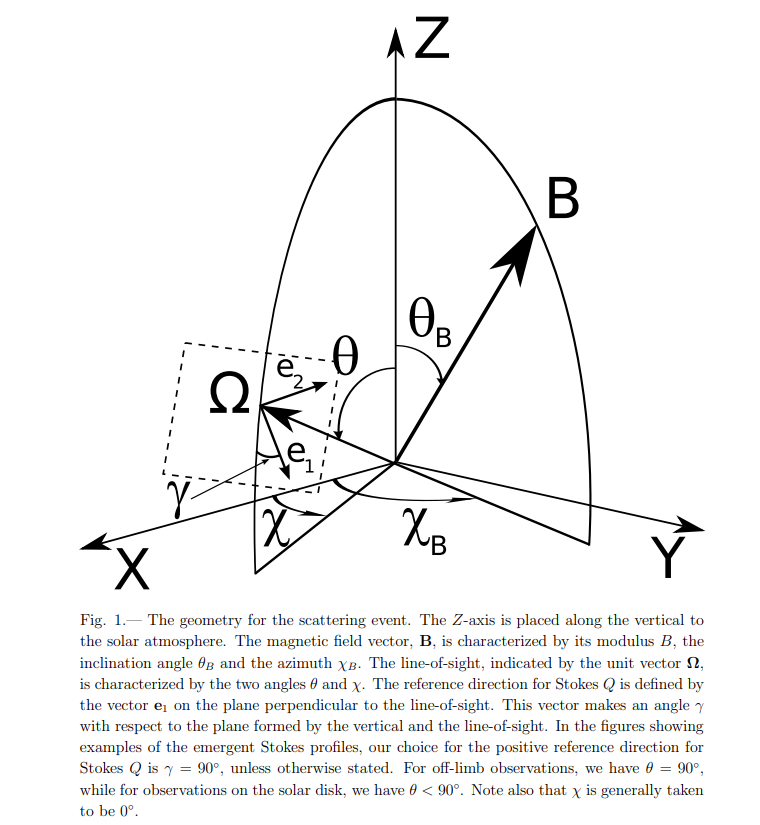

(-0.05, 0.05)

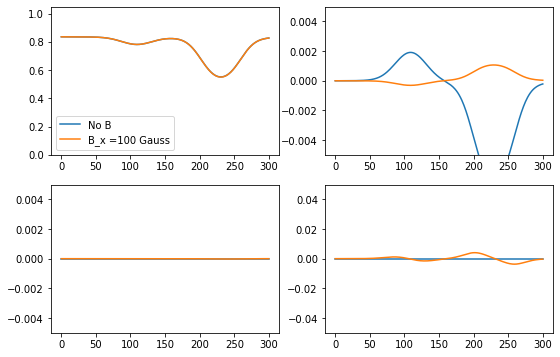

In [21]:
del(mod)
mod = hazel.Model(working_mode='synthesis')
mod.add_spectral({'Name': 'spec1', 'Wavelength': [10828, 10831, 301], 'topology': 'ch1',
    'LOS': [60.0,0.0,0.0], 'Boundary condition': [1.0,0.0,0.0,0.0]})
mod.add_chromosphere({'Name': 'ch1', 'Spectral region': 'spec1', 'Height': 3.0, 'Line': '10830', 'Wavelength': [10826, 10833]})
mod.setup()
# This is the same setup (LOS angles) as the previous cell, and for H = 3

Bx = 100
By = 0.0
Bz = 0.0

mod.atmospheres['ch1'].set_parameters([Bx,By,Bz,tau,vlos,vth,1.0,a],1.0)
mod.synthesize()
spec3 = np.copy(mod.spectrum['spec1'].stokes)

plt.figure(figsize=[9,6])
plt.subplot(221)
plt.plot(spec1[0],label='No B')
plt.plot(spec3[0],label='B_x =' +str(Bx) +' Gauss')
plt.legend()
plt.ylim([0,1.05])
plt.subplot(222)
plt.plot(spec1[1])
plt.plot(spec3[1])
plt.ylim([-0.005,0.005])
plt.subplot(223)
plt.plot(spec1[2])
plt.plot(spec3[2])
plt.ylim([-0.005,0.005])
plt.subplot(224)
plt.plot(spec1[3])
plt.plot(spec3[3])
plt.ylim([-0.05,0.05])

(-0.01, 0.01)

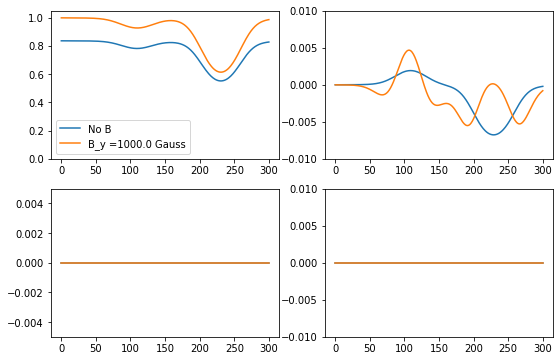

In [24]:
# Same but now adding B_y

del(mod)
mod = hazel.Model(working_mode='synthesis')
mod.add_spectral({'Name': 'spec1', 'Wavelength': [10828, 10831, 301], 'topology': 'ch1',
    'LOS': [60.0,0.0,0.0], 'Boundary condition': [1.0,0.0,0.0,0.0]})
mod.add_chromosphere({'Name': 'ch1', 'Spectral region': 'spec1', 'Height': 3.0, 'Line': '10830', 'Wavelength': [10826, 10833]})
mod.setup()

Bx = 0.0
By = 1000.0
Bz = 0.0
mod.atmospheres['ch1'].set_parameters([Bx,By,Bz,tau,vlos,vth,1.0,a],1.0)
mod.synthesize()
spec3 = np.copy(mod.spectrum['spec1'].stokes)

plt.figure(figsize=[9,6])
plt.subplot(221)
plt.plot(spec1[0],label='No B')
plt.plot(spec3[0],label='B_y =' +str(By) +' Gauss')
plt.legend()
plt.ylim([0,1.05])
plt.subplot(222)
plt.plot(spec1[1])
plt.plot(spec3[1])
plt.ylim([-0.01,0.01])
plt.subplot(223)
plt.plot(spec1[2])
plt.plot(spec3[2])
plt.ylim([-0.005,0.005])
plt.subplot(224)
plt.plot(spec1[3])
plt.plot(spec3[3])
plt.ylim([-0.01,0.01])

(-0.1, 0.1)

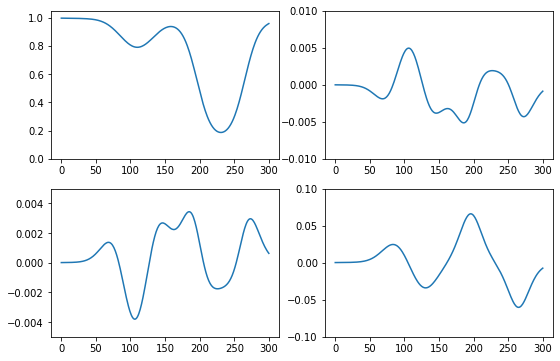

In [33]:
# Disk center - transversal Zeeman:


del(mod)
mod = hazel.Model(working_mode='synthesis')
mod.add_spectral({'Name': 'spec1', 'Wavelength': [10828, 10831, 301], 'topology': 'ch1',
    'LOS': [0.0,0.0,0.0], 'Boundary condition': [1.0,0.0,0.0,0.0]})
mod.add_chromosphere({'Name': 'ch1', 'Spectral region': 'spec1', 'Height': 50.0, 'Line': '10830', 'Wavelength': [10826, 10833]})
mod.setup()

tau = 2.0
deltav= 1.0
Bx = 231.0
By = 700.0
Bz = 500.0
mod.atmospheres['ch1'].set_parameters([Bx,By,Bz,tau,vlos,vth,0.2,a],1.0)
mod.synthesize()
spec4 = np.copy(mod.spectrum['spec1'].stokes)

plt.figure(figsize=[9,6])
plt.subplot(221)
plt.plot(spec4[0])
plt.ylim([0,1.05])
plt.subplot(222)
plt.plot(spec4[1])
plt.ylim([-0.01,0.01])
plt.subplot(223)
plt.plot(spec4[2])
plt.ylim([-0.005,0.005])
plt.subplot(224)
plt.plot(spec4[3])
plt.ylim([-0.1,0.1])

### Why is there no U ever?

(-0.01, 0.01)

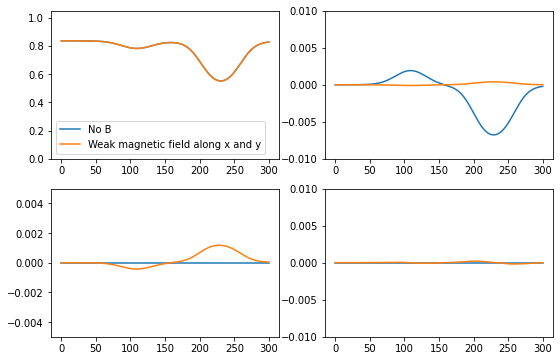

In [39]:
# How about a mixture?
del(mod)
mod = hazel.Model(working_mode='synthesis')
mod.add_spectral({'Name': 'spec1', 'Wavelength': [10828, 10831, 301], 'topology': 'ch1',
    'LOS': [60.0,0.0,0.0], 'Boundary condition': [1.0,0.0,0.0,0.0]})
mod.add_chromosphere({'Name': 'ch1', 'Spectral region': 'spec1', 'Height': 3.0, 'Line': '10830', 'Wavelength': [10826, 10833]})
mod.setup()

Bx = 0.0
By = 0.0
Bz = 0.0

mod.atmospheres['ch1'].set_parameters([Bx,By,Bz,tau,vlos,vth,1.0,a],1.0)
mod.synthesize()
spec1 = np.copy(mod.spectrum['spec1'].stokes)

del(mod)
mod = hazel.Model(working_mode='synthesis')
mod.add_spectral({'Name': 'spec1', 'Wavelength': [10828, 10831, 301], 'topology': 'ch1',
    'LOS': [60.0,0.0,0.0], 'Boundary condition': [1.0,0.0,0.0,0.0]})
mod.add_chromosphere({'Name': 'ch1', 'Spectral region': 'spec1', 'Height': 3.0, 'Line': '10830', 'Wavelength': [10826, 10833]})
mod.setup()

Bx = 5.0
By = 2.0
Bz = 0.0

mod.atmospheres['ch1'].set_parameters([Bx,By,Bz,tau,vlos,vth,1.0,a],1.0)
mod.synthesize()
spec5 = np.copy(mod.spectrum['spec1'].stokes)

plt.figure(figsize=[9,6])
plt.subplot(221)
plt.plot(spec1[0],label='No B')
plt.plot(spec5[0],label='Weak magnetic field along x and y')
plt.legend()
plt.ylim([0,1.05])
plt.subplot(222)
plt.plot(spec1[1])
plt.plot(spec5[1])
plt.ylim([-0.01,0.01])
plt.subplot(223)
plt.plot(spec1[2])
plt.plot(spec5[2])
plt.ylim([-0.005,0.005])
plt.subplot(224)
plt.plot(spec1[3])
plt.plot(spec5[3])
plt.ylim([-0.01,0.01])

#### ~ A small discussion on how the magnetic field influences Q,U,V.... ~ 

### Let's analyze each Stokes component separately. I think we can all agree that Stokes I is almost unaffected by the magnetic field (at least until now). So let's look at V as that is the one we are kinda already familiar with. We covered it at our previous school. For that I am going to make a different example. We are going to look exactly at the limb, and see what magnetic fields are doing. Recall the Hazel geometry, from the Hazel paper (Asensio Ramos, Trujillo Bueno and Landi degl'Innocenti, 2008), as reported above:


### I am also going to change the boundary condition to zero, so that we are basically looking at a prominence:


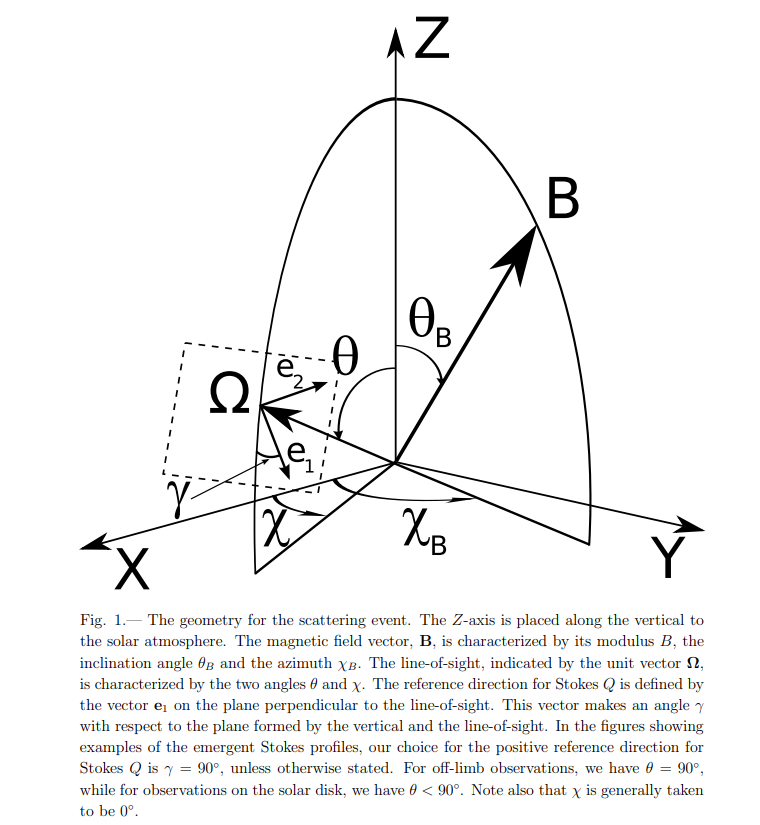

(-0.02, 0.02)

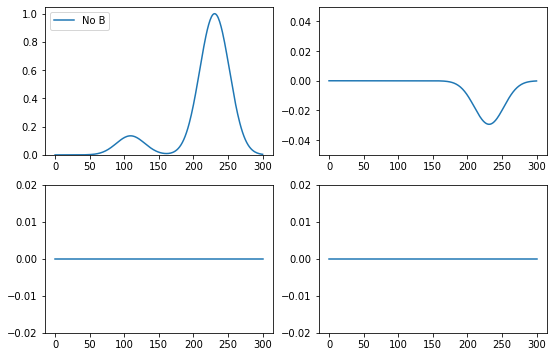

In [40]:
# No magnetic field:

del(mod)
mod = hazel.Model(working_mode='synthesis')
mod.add_spectral({'Name': 'spec1', 'Wavelength': [10828, 10831, 301], 'topology': 'ch1',
    'LOS': [90.0,0.0,0.0], 'Boundary condition': [0.0,0.0,0.0,0.0]})
mod.add_chromosphere({'Name': 'ch1', 'Spectral region': 'spec1', 'Height': 3.0, 'Line': '10830', 'Wavelength': [10826, 10833]})
mod.setup()

Bx = 0.0
By = 0.0
Bz = 0.0
tau = 0.1
vlos =0.0
vth = 8.0
a = 0.0

mod.atmospheres['ch1'].set_parameters([Bx,By,Bz,tau,vlos,vth,1.0,a],1.0)
mod.synthesize()
spec0 = np.copy(mod.spectrum['spec1'].stokes)

plt.figure(figsize=[9,6])
plt.subplot(221)
plt.plot(spec0[0],label='No B')
plt.legend()
plt.ylim([0,1.05])
plt.subplot(222)
plt.plot(spec0[1])
plt.ylim([-0.05,0.05])
plt.subplot(223)
plt.plot(spec0[2])
plt.ylim([-0.02,0.02])
plt.subplot(224)
plt.plot(spec0[3])
plt.ylim([-0.02,0.02])

### Let's all agree that the $B_x$ in this case is the magnetic field pointing toward us and let's see what happens when we change that:

Text(0.5, 0, 'Wavelength')

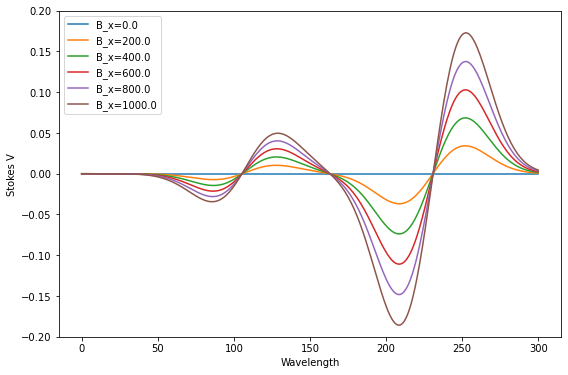

In [41]:
del(mod)
mod = hazel.Model(working_mode='synthesis')
mod.add_spectral({'Name': 'spec1', 'Wavelength': [10828, 10831, 301], 'topology': 'ch1',
    'LOS': [90.0,0.0,0.0], 'Boundary condition': [0.0,0.0,0.0,0.0]})
mod.add_chromosphere({'Name': 'ch1', 'Spectral region': 'spec1', 'Height': 3.0, 'Line': '10830', 'Wavelength': [10826, 10833]})
mod.setup()

Bx = 0.0
By = 0.0
Bz = 0.0
plt.figure(figsize=[9,6])
for i in range(0,6):
    Bx = i*200.0
    mod.atmospheres['ch1'].set_parameters([Bx,By,Bz,tau,vlos,vth,1.0,a],1.0)
    mod.synthesize()
    spec = np.copy(mod.spectrum['spec1'].stokes)
    plt.plot(spec[3],label='B_x='+str(Bx))
    plt.ylim([-0.2,0.2])
    plt.legend()
plt.ylabel("Stokes V")
plt.xlabel("Wavelength")

### Does this make sense in the context of what you know about Zeeman effect? 

### Let's now look at, say, Stokes Q:

Text(0.5, 0, 'Wavelength')

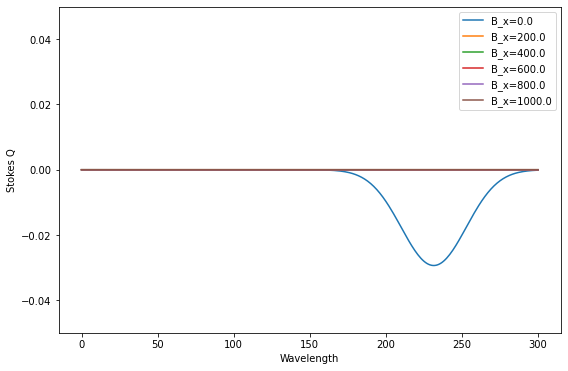

In [42]:
del(mod)
mod = hazel.Model(working_mode='synthesis')
mod.add_spectral({'Name': 'spec1', 'Wavelength': [10828, 10831, 301], 'topology': 'ch1',
    'LOS': [90.0,0.0,0.0], 'Boundary condition': [0.0,0.0,0.0,0.0]})
mod.add_chromosphere({'Name': 'ch1', 'Spectral region': 'spec1', 'Height': 3.0, 'Line': '10830', 'Wavelength': [10826, 10833]})
mod.setup()

Bx = 0.0
By = 0.0
Bz = 0.0
plt.figure(figsize=[9,6])
for i in range(0,6):
    Bx = i*200.0
    mod.atmospheres['ch1'].set_parameters([Bx,By,Bz,tau,vlos,vth,1.0,a],1.0)
    mod.synthesize()
    spec = np.copy(mod.spectrum['spec1'].stokes)
    plt.plot(spec[1],label='B_x='+str(Bx))
    plt.ylim([-0.05,0.05])
    plt.legend()
plt.ylabel("Stokes Q")
plt.xlabel("Wavelength")

### What is happening here?

#### Discuss for a little bit.

Text(0.5, 0, 'Wavelength')

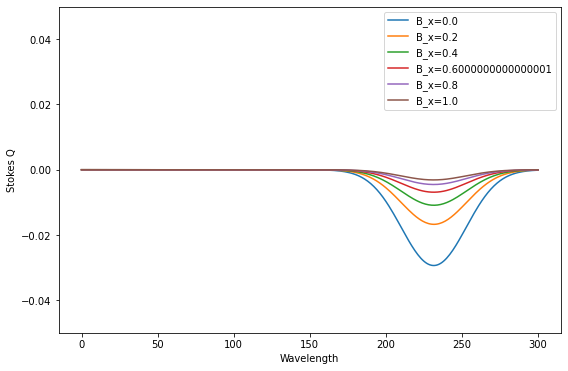

In [43]:
del(mod)
mod = hazel.Model(working_mode='synthesis')
mod.add_spectral({'Name': 'spec1', 'Wavelength': [10828, 10831, 301], 'topology': 'ch1',
    'LOS': [90.0,0.0,0.0], 'Boundary condition': [0.0,0.0,0.0,0.0]})
mod.add_chromosphere({'Name': 'ch1', 'Spectral region': 'spec1', 'Height': 3.0, 'Line': '10830', 'Wavelength': [10826, 10833]})
mod.setup()

Bx = 0.0
By = 0.0
Bz = 0.0
plt.figure(figsize=[9,6])
for i in range(0,6):
    Bx = i*0.2
    mod.atmospheres['ch1'].set_parameters([Bx,By,Bz,tau,vlos,vth,1.0,a],1.0)
    mod.synthesize()
    spec = np.copy(mod.spectrum['spec1'].stokes)
    plt.plot(spec[1],label='B_x='+str(Bx))
    plt.ylim([-0.05,0.05])
    plt.legend()
plt.ylabel("Stokes Q")
plt.xlabel("Wavelength")

Text(0.5, 0, 'Wavelength')

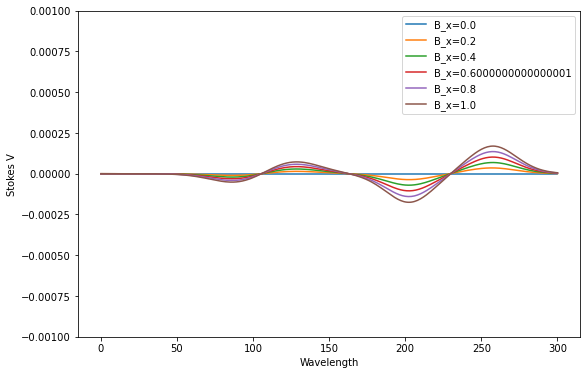

In [125]:
del(mod)
mod = hazel.Model(working_mode='synthesis')
mod.add_spectral({'Name': 'spec1', 'Wavelength': [10828, 10831, 301], 'topology': 'ch1',
    'LOS': [90.0,0.0,90.0], 'Boundary condition': [0.0,0.0,0.0,0.0]})
mod.add_chromosphere({'Name': 'ch1', 'Spectral region': 'spec1', 'Height': 3.0, 'Line': '10830', 'Wavelength': [10826, 10833]})
mod.setup()

Bx = 0.0
By = 0.0
Bz = 0.0
plt.figure(figsize=[9,6])
for i in range(0,6):
    Bx = i*0.2
    mod.atmospheres['ch1'].set_parameters([Bx,By,Bz,tau,vlos,vth,1.0,a],1.0)
    mod.synthesize()
    spec = np.copy(mod.spectrum['spec1'].stokes)
    plt.plot(spec[3],label='B_x='+str(Bx))
    plt.ylim([-0.001,0.001])
    plt.legend()
plt.ylabel("Stokes V")
plt.xlabel("Wavelength")

### What can we conclude from this about the sensitivity of Stokes Q and Stokes V to the magnetic field?

### Before we move on, let's look at the Stokes U, too:

Text(0.5, 0, 'Wavelength')

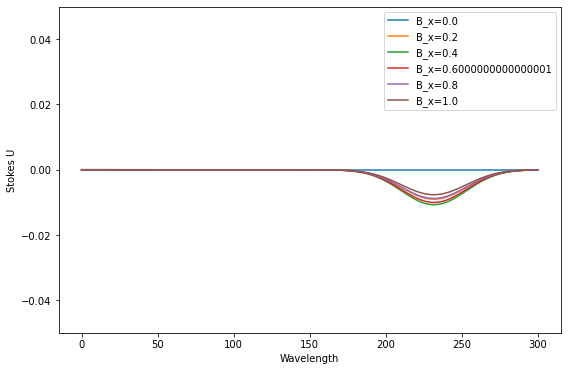

In [46]:
del(mod)
mod = hazel.Model(working_mode='synthesis')
mod.add_spectral({'Name': 'spec1', 'Wavelength': [10828, 10831, 301], 'topology': 'ch1',
    'LOS': [90.0,0.0,00.0], 'Boundary condition': [0.0,0.0,0.0,0.0]})
mod.add_chromosphere({'Name': 'ch1', 'Spectral region': 'spec1', 'Height': 3.0, 'Line': '10830', 'Wavelength': [10826, 10833]})
mod.setup()

Bx = 0.0
By = 0.0
Bz = 0.0
plt.figure(figsize=[9,6])
for i in range(0,6):
    Bx = i*0.2
    mod.atmospheres['ch1'].set_parameters([Bx,By,Bz,tau,vlos,vth,1.0,a],1.0)
    mod.synthesize()
    spec = np.copy(mod.spectrum['spec1'].stokes)
    plt.plot(spec[2],label='B_x='+str(Bx))
    plt.ylim([-0.05,0.05])
    plt.legend()
plt.ylabel("Stokes U")
plt.xlabel("Wavelength")

## So, we analyzed Line-of-Sight magnetic field and we saw how it influenced Stokes Q,U, and V

#### We can write up some of our conclusions here:

## Now, a similar test, but now changing $B_y$!

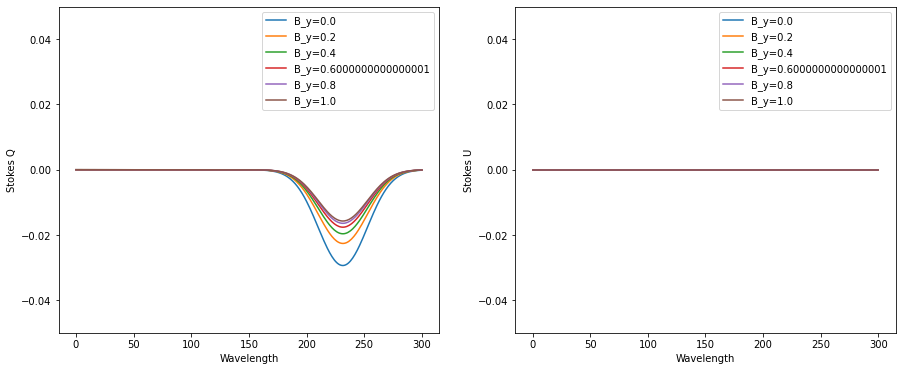

In [49]:
del(mod)
mod = hazel.Model(working_mode='synthesis')
mod.add_spectral({'Name': 'spec1', 'Wavelength': [10828, 10831, 301], 'topology': 'ch1',
    'LOS': [90.0,0.0,0.0], 'Boundary condition': [0.0,0.0,0.0,0.0]})
mod.add_chromosphere({'Name': 'ch1', 'Spectral region': 'spec1', 'Height': 3.0, 'Line': '10830', 'Wavelength': [10826, 10833]})
mod.setup()

Bx = 0.0
By = 0.0
Bz = 0.0

plt.figure(figsize=[15,6])
for i in range(0,6):
    
    By = i*0.2
    mod.atmospheres['ch1'].set_parameters([Bx,By,Bz,tau,vlos,vth,1.0,a],1.0)
    mod.synthesize()
    spec = np.copy(mod.spectrum['spec1'].stokes)
    plt.subplot(121)
    plt.plot(spec[1],label='B_y='+str(By))
    plt.ylim([-0.05,0.05])
    plt.legend()
    plt.ylabel("Stokes Q")
    plt.xlabel("Wavelength")
    plt.subplot(122)
    plt.plot(spec[2],label='B_y='+str(By))
    plt.ylim([-0.05,0.05])
    plt.legend()
    plt.ylabel("Stokes U")
    plt.xlabel("Wavelength")

### Note that Stokes U stays zero! 


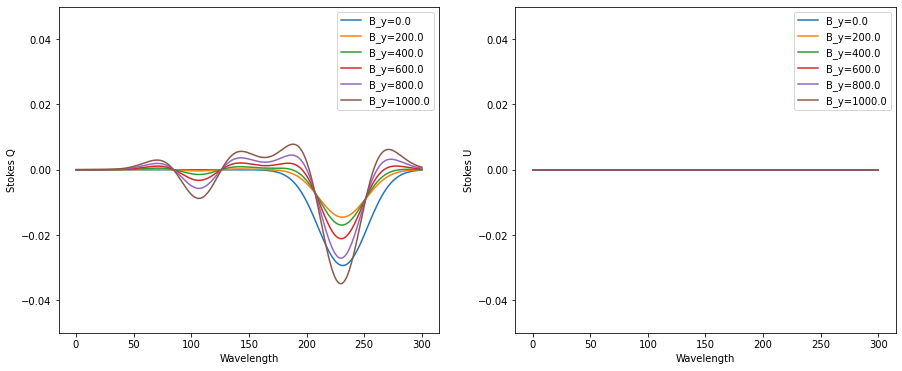

In [50]:
# For stronger fields:

del(mod)
mod = hazel.Model(working_mode='synthesis')
mod.add_spectral({'Name': 'spec1', 'Wavelength': [10828, 10831, 301], 'topology': 'ch1',
    'LOS': [90.0,0.0,0.0], 'Boundary condition': [0.0,0.0,0.0,0.0]})
mod.add_chromosphere({'Name': 'ch1', 'Spectral region': 'spec1', 'Height': 3.0, 'Line': '10830', 'Wavelength': [10826, 10833]})
mod.setup()

Bx = 0.0
By = 0.0
Bz = 0.0


plt.figure(figsize=[15,6])
for i in range(0,6):
    
    By = i*200.0
    mod.atmospheres['ch1'].set_parameters([Bx,By,Bz,tau,vlos,vth,1.0,a],1.0)
    mod.synthesize()
    spec = np.copy(mod.spectrum['spec1'].stokes)
    plt.subplot(121)
    plt.plot(spec[1],label='B_y='+str(By))
    plt.ylim([-0.05,0.05])
    plt.legend()
    plt.ylabel("Stokes Q")
    plt.xlabel("Wavelength")
    plt.subplot(122)
    plt.plot(spec[2],label='B_y='+str(By))
    plt.ylim([-0.05,0.05])
    plt.legend()
    plt.ylabel("Stokes U")
    plt.xlabel("Wavelength")

## Finally, the $B_z$ component of the magnetic field

#### In this specific example this is the component that is perpendicular to the line of sight AND coincides with the atmospheric normal. 


#### Any guesses what will happen, and why?

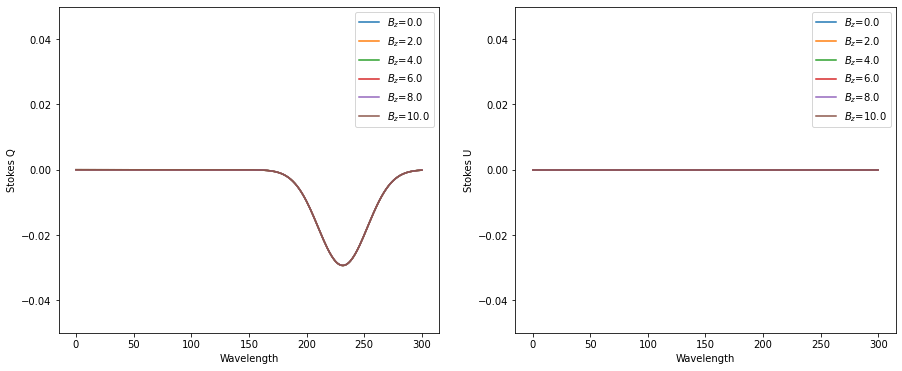

In [52]:
# For weaker fields:

del(mod)
mod = hazel.Model(working_mode='synthesis')
mod.add_spectral({'Name': 'spec1', 'Wavelength': [10828, 10831, 301], 'topology': 'ch1',
    'LOS': [90.0,0.0,0.0], 'Boundary condition': [0.0,0.0,0.0,0.0]})
mod.add_chromosphere({'Name': 'ch1', 'Spectral region': 'spec1', 'Height': 3.0, 'Line': '10830', 'Wavelength': [10826, 10833]})
mod.setup()

Bx = 0.0
By = 0.0
Bz = 0.0


plt.figure(figsize=[15,6])
for i in range(0,6):
    
    Bz = i*2.0
    mod.atmospheres['ch1'].set_parameters([Bx,By,Bz,tau,vlos,vth,1.0,a],1.0)
    mod.synthesize()
    spec = np.copy(mod.spectrum['spec1'].stokes)
    plt.subplot(121)
    plt.plot(spec[1],label='$B_z$='+str(Bz))
    plt.ylim([-0.05,0.05])
    plt.legend()
    plt.ylabel("Stokes Q")
    plt.xlabel("Wavelength")
    plt.subplot(122)
    plt.plot(spec[2],label='$B_z$='+str(Bz))
    plt.ylim([-0.05,0.05])
    plt.legend()
    plt.ylabel("Stokes U")
    plt.xlabel("Wavelength")

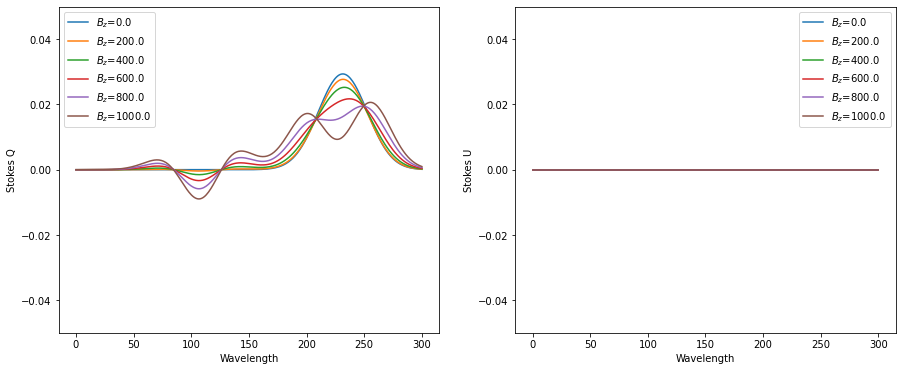

In [53]:
# For Stronger fields:

del(mod)
mod = hazel.Model(working_mode='synthesis')
mod.add_spectral({'Name': 'spec1', 'Wavelength': [10828, 10831, 301], 'topology': 'ch1',
    'LOS': [90.0,0.0,90.0], 'Boundary condition': [0.0,0.0,0.0,0.0]})
mod.add_chromosphere({'Name': 'ch1', 'Spectral region': 'spec1', 'Height': 3.0, 'Line': '10830', 'Wavelength': [10826, 10833]})
mod.setup()

Bx = 0.0
By = 0.0
Bz = 0.0
plt.figure(figsize=[15,6])
for i in range(0,6):
    
    Bz = i*200.0
    mod.atmospheres['ch1'].set_parameters([Bx,By,Bz,tau,vlos,vth,1.0,a],1.0)
    mod.synthesize()
    spec = np.copy(mod.spectrum['spec1'].stokes)
    plt.subplot(121)
    plt.plot(spec[1],label='$B_z$='+str(Bz))
    plt.ylim([-0.05,0.05])
    plt.legend()
    plt.ylabel("Stokes Q")
    plt.xlabel("Wavelength")
    plt.subplot(122)
    plt.plot(spec[2],label='$B_z$='+str(Bz))
    plt.ylim([-0.05,0.05])
    plt.legend()
    plt.ylabel("Stokes U")
    plt.xlabel("Wavelength")

### Again, there is Zeeman signature, turning into Paschen-Back effect. In the case of magnetic field that coincides with the axis of symmetry of the radiation field, there is no Hanle effect!

## Finally, disk - center situation again. (I.e. filaments with inclined magnetic field):

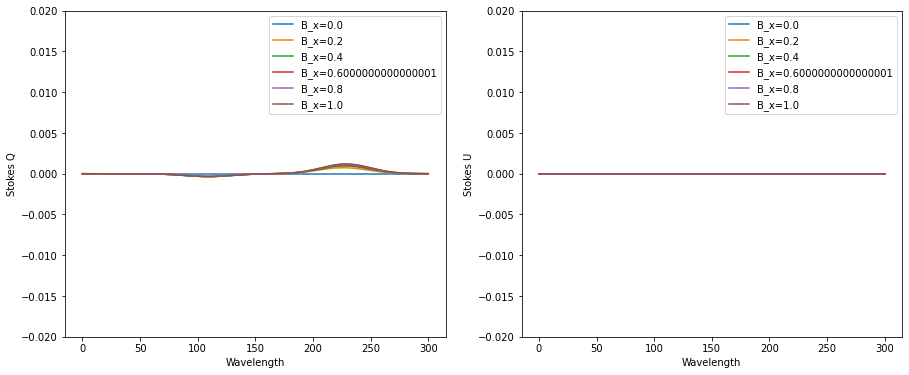

In [55]:

del(mod)
mod = hazel.Model(working_mode='synthesis')
mod.add_spectral({'Name': 'spec1', 'Wavelength': [10828, 10831, 301], 'topology': 'ch1',
    'LOS': [0.0,0.0,0.0], 'Boundary condition': [1.0,0.0,0.0,0.0]})
mod.add_chromosphere({'Name': 'ch1', 'Spectral region': 'spec1', 'Height': 30.0, 'Line': '10830', 'Wavelength': [10826, 10833]})
mod.setup()

Bx = 0.0
By = 0.0
Bz = 0.0
plt.figure(figsize=[15,6])
for i in range(0,6):
    
    Bx = i*0.2
    mod.atmospheres['ch1'].set_parameters([Bx,By,Bz,tau,vlos,vth,1.0,a],1.0)
    mod.synthesize()
    spec = np.copy(mod.spectrum['spec1'].stokes)
    plt.subplot(121)
    plt.plot(spec[1],label='B_x='+str(Bx))
    plt.ylim([-0.02,0.02])
    plt.legend()
    plt.ylabel("Stokes Q")
    plt.xlabel("Wavelength")
    plt.subplot(122)
    plt.plot(spec[2],label='B_x='+str(Bx))
    plt.ylim([-0.02,0.02])
    plt.legend()
    plt.ylabel("Stokes U")
    plt.xlabel("Wavelength")

### Stokes Q is created! Magnetic field breaks the symmetry of the radiation field and creates linear polarization even at the disk center, where there would be no linear polarization otherwise!

## So, to summarize and to make a very important point: 

### 1) The zero-level polarization depends on the height of the slab above the limb as well as on our viewing geometry (zero at the disk center, maximum at the limb, in the absence of the magnetic field)

### 2) Magnetic field changes this. Line-of-sight magnetic field introduces Stokes V via Zeeman effect, tangential magnetic field creates Q and U via Zeeman effect. This requires strong mangetic fields (~ 100G and more)

### 3) Weak magnetic field that does not coincide with the symmetry axis of the radiation field will also modify/create the linear polarization. This effect, however, is sensitive to even much weaker magnetic fields (~ 0.1G)

### Spend some time discussing about this. 

### The problems will emerge when we have strong enough field to 'saturate' Hanle effect, but not strong enough to be easily detectable via Zeeman effect. I.e. we will have two practically indistinguishable spectra. Have a look at this example:

Text(0.5, 0, 'Wavelength')

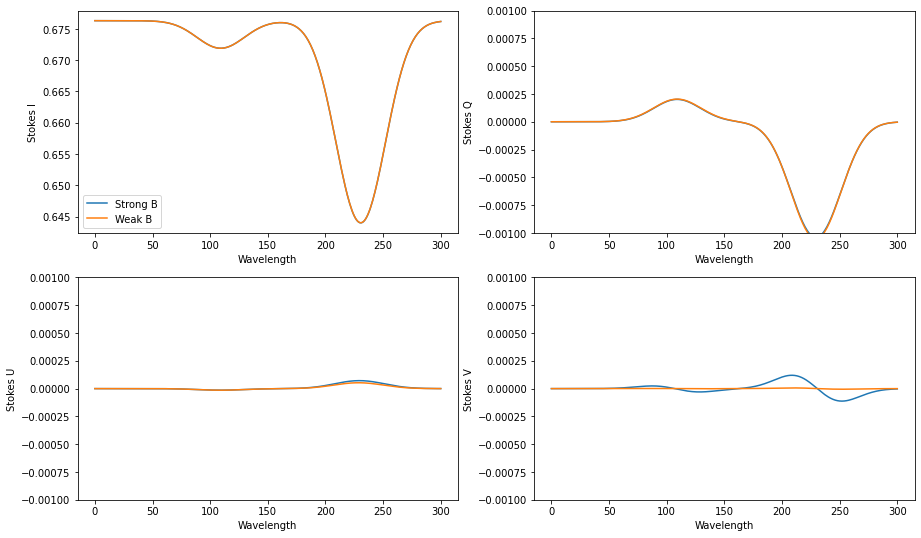

In [63]:
del(mod)
mod = hazel.Model(working_mode='synthesis')
mod.add_spectral({'Name': 'spec1', 'Wavelength': [10828, 10831, 301], 'topology': 'ch1',
    'LOS': [80.0,0.0,0.0], 'Boundary condition': [1.0,0.0,0.0,0.0]})
mod.add_chromosphere({'Name': 'ch1', 'Spectral region': 'spec1', 'Height': 25.0, 'Line': '10830', 'Wavelength': [10826, 10833]})
mod.setup()

Bx = 20.0
By = 100.0
Bz = 0.0
mod.atmospheres['ch1'].set_parameters([Bx,By,Bz,tau,vlos,vth,1.0,a],1.0)
mod.synthesize()
spec1 = np.copy(mod.spectrum['spec1'].stokes)


Bx = 1
By = 5
Bz =0.0
mod.atmospheres['ch1'].set_parameters([Bx,By,Bz,tau,vlos,vth,1.0,a],1.0)
mod.synthesize()
spec2 = np.copy(mod.spectrum['spec1'].stokes)

plt.figure(figsize=[15,9])
    
plt.subplot(221)
plt.plot(spec1[0],label='Strong B')
plt.plot(spec2[0],label='Weak B')
plt.legend()
plt.ylabel("Stokes I")
plt.xlabel("Wavelength")
plt.subplot(222)
plt.plot(spec1[1])
plt.plot(spec2[1])
plt.ylim([-0.001,0.001])
plt.ylabel("Stokes Q")
plt.xlabel("Wavelength")
plt.subplot(223)
plt.plot(spec1[2])
plt.plot(spec2[2])
plt.ylim([-0.001,0.001])
plt.ylabel("Stokes U")
plt.xlabel("Wavelength")
plt.subplot(224)
plt.plot(spec1[3])
plt.plot(spec2[3])
plt.ylim([-0.001,0.001])
plt.ylabel("Stokes V")
plt.xlabel("Wavelength")

### More on ambiguities! 

#### It turns out that different magnetic field configurations result in the same (or almost the same) linear polarization. For example:

15.194190628092656 5.231779394839343 19.151111077974452
15.050308876302639 15.585051073322662 -3.8202599086724667
15.19419062809266 -5.231779394839345 -19.15111107797445
15.050308876302639 -15.585051073322662 3.820259908672469


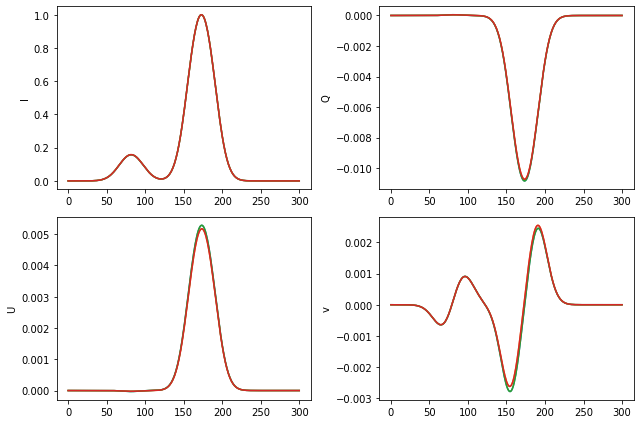

In [64]:
# Four possible magnetic field configurations:
# (strength, inclination wrt local vertical, and azimuth angle)
# Example from Asensio Ramos et al. 2008 paper
B =  ((25., 22.,  25.,  22.))
thB = ((40, 100., 140.,  80.))
azB = ((19., 46.,  -19., -46.))

# the rest of the thermodynamical parameters are the same in all cases:
tau = 0.5
v_los = 0.0
v_th = 8.0
Beta = 1.0
Damp = 0.0
FF = 1.0

# Create model object
mod = hazel.Model(working_mode='synthesis')

# Define the line of sight of the observation (inclination, azimuth, Qreference) for 
# the observation of a prominence (30 arcsec above the limb)
LOS = [90.0, 0.0, 0.0]

mod.add_spectral({'Name' :  'spec1', 'Wavelength' : [10828, 10832, 301], 'topology' : 'ch1',
                'LOS' : LOS, 'Boundary condition' : [0.0, 0.0, 0.0, 0.0]})
mod.add_chromosphere({'Name' : 'ch1', 'Spectral region' : 'spec1', 'Height' : 20.0,
                     'Line' : '10830', 'Wavelength' : [10826, 10833]})
mod.setup()

# Plot spectrum
plt.figure(figsize=[9,6])

for jj in range(len(B)): # loop to synthesize s different magnetic configurations
    # Convert magnetic field into cartesian coordinates in local vertical reference frame:
    Bx = B[jj] * np.sin(thB[jj]*np.pi/180.) * np.cos(azB[jj]*np.pi/180.)
    By = B[jj] * np.sin(thB[jj]*np.pi/180.) * np.sin(azB[jj]*np.pi/180.)
    Bz = B[jj] * np.cos(thB[jj]*np.pi/180.)
    
    print (Bx,By,Bz)

    # Synthesize spectra for each magnetic model
    mod.atmospheres['ch1'].set_parameters([Bx, By, Bz, tau, v_los, v_th, Beta, Damp], FF)
    mod.synthesize()
    mod1 = np.copy(mod.spectrum['spec1'].stokes)

    plt.subplot(221)
    plt.plot(mod1[0,:], label = 'Model '+str(jj))
    plt.ylabel('I')
    plt.subplot(222)
    plt.plot(mod1[1,:])
    plt.ylabel('Q')
    plt.subplot(223)
    plt.plot(mod1[2,:])
    plt.ylabel('U')
    plt.subplot(224)
    plt.plot(mod1[3,:])
    plt.ylabel('v')

plt.tight_layout()